In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [2]:
import numpy as np
from sklearn.datasets import make_moons

def make_moons_random_assignment(n_samples, n_new_dims=0, seed=0):
    np.random.seed(seed)
    X, l = make_moons(n_samples=n_samples, random_state=seed, noise=0.0)
    X = np.hstack((X, np.zeros((len(X), n_new_dims))))
    return X, l


np.random.seed(0)
random_seeds = np.random.choice(1_000_000, replace=False, size=10)
n_dims = list(range(2, 11, 1))
twoMoons_datasets = [
    [make_moons_random_assignment(500, n_new_dims=n_dim-2, seed=seed) for seed in random_seeds]
    for n_dim in n_dims
]

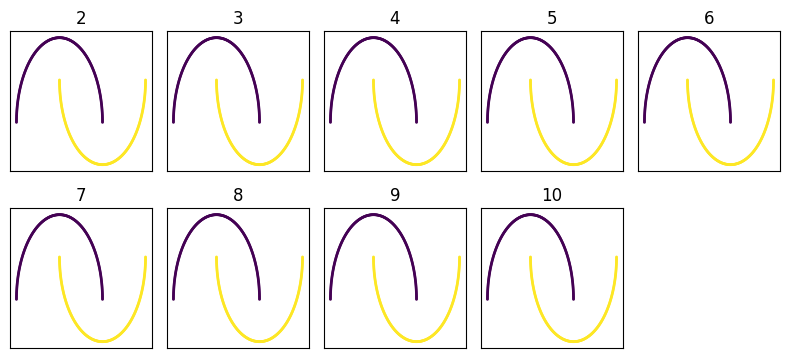

In [3]:
import matplotlib.pyplot as plt
from data._util_plots import plot_datasets

plot_datasets(twoMoons_datasets, n_dims, rows=5, cols=5, figsize=1.6)
plt.savefig("imgs/TwoMoons_noise_data.png")

In [4]:
from data._util_experiments import cache, calc_eval_measures_for_multiple_datasets
from data._metrics import create_and_filter_df


eval_results = cache("TwoMoons_dims", calc_eval_measures_for_multiple_datasets, [twoMoons_datasets, n_dims])

df = create_and_filter_df(eval_results)

In [5]:
df = df.rename(columns={"dataset": "n_dims"})
df[(df.measure == "DBCV") & (df.n_dims == 4)]

,n_dims,measure,run,value,time,process_time
262,4,DBCV,0,0.461556,0.185156,1.984861
275,4,DBCV,0,0.461556,0.243412,3.835136
288,4,DBCV,0,0.461556,0.165092,2.318380
301,4,DBCV,0,0.461556,0.193758,2.093718
314,4,DBCV,0,0.461556,0.183627,2.245643
327,4,DBCV,0,0.461556,0.137328,1.320435
340,4,DBCV,0,0.461556,0.111928,1.439317
353,4,DBCV,0,0.461556,0.217710,3.415489
366,4,DBCV,0,0.461556,0.226029,2.540769
379,4,DBCV,0,0.461556,0.244705,2.885126


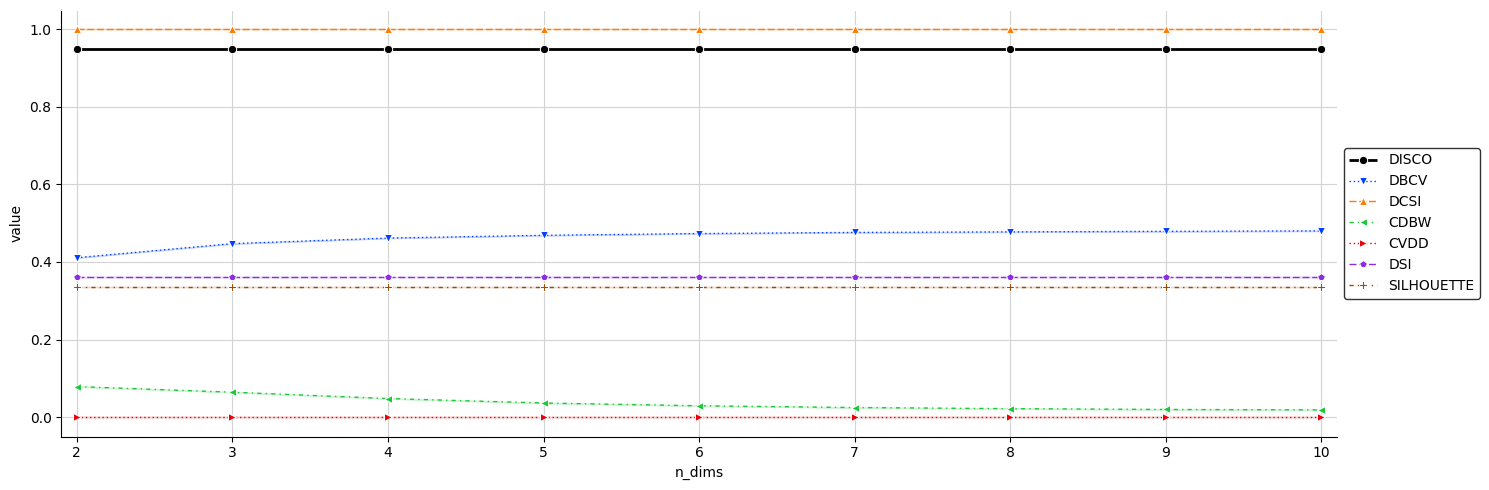

In [6]:
from data._util_plots import plot_lineplot

eps = 0.1
ymin, ymax = n_dims[0] - eps, n_dims[-1] + eps
# df = df.rename(columns={"dataset": "n_dims"})

plot_lineplot(df, "n_dims", "value", "measure", x_range=(ymin, ymax), y_range=(None, None))
plt.savefig("imgs/TwoMoons_dims.png")